In [13]:
# essential libraries
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# read the image
image = cv2.imread('downloads/coins.jpg')

In [15]:
# convert original image to gray
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [16]:
# perform 5x5 gaussian blur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

In [17]:
# convert image to binary
_, inverted_binary_image = cv2.threshold(blurred_image, 130, 255, cv2.THRESH_BINARY)

In [18]:
# lets highlight the coins
binary_image = cv2.bitwise_not(inverted_binary_image)

In [19]:
# find the contours
_, coin_contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [20]:
# make a copy of the image
contour_image = np.copy(image)

In [21]:
# declare minimum area and an empty list
minimum_area = 60
large_contours = []

# loop to find large contours
for contour in coin_contours:
    if cv2.contourArea(contour) > minimum_area:
        large_contours.append(contour)


In [22]:
# draw the detected contours onto image
cv2.drawContours(contour_image, large_contours, -1, (255, 0, 0))

array([[[185, 190, 191],
        [185, 190, 191],
        [185, 190, 191],
        ...,
        [191, 196, 194],
        [191, 196, 194],
        [191, 196, 195]],

       [[185, 190, 191],
        [185, 190, 191],
        [185, 190, 191],
        ...,
        [190, 195, 193],
        [190, 195, 193],
        [191, 196, 195]],

       [[185, 190, 191],
        [185, 190, 191],
        [185, 190, 191],
        ...,
        [189, 194, 192],
        [189, 194, 192],
        [188, 193, 192]],

       ...,

       [[183, 191, 190],
        [183, 191, 190],
        [183, 191, 190],
        ...,
        [164, 173, 170],
        [162, 171, 168],
        [161, 170, 167]],

       [[183, 191, 190],
        [183, 191, 190],
        [183, 191, 190],
        ...,
        [165, 175, 169],
        [163, 173, 167],
        [163, 173, 167]],

       [[183, 191, 190],
        [183, 191, 190],
        [183, 191, 190],
        ...,
        [158, 168, 162],
        [160, 170, 164],
        [161, 171, 165]]

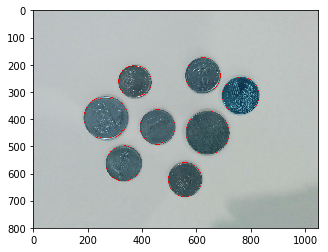

In [23]:
# display the detected contours
plt.imshow(contour_image)

In [24]:
cv2.imwrite('contour_image.jpg', contour_image)

True

In [25]:
# count the number of coins
print('there are ' + str(len(large_contours)) + ' coins in the image')

there are 8 coins in the image
